# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Load Dataset

In [2]:
df = pd.read_csv("/content/mobil123_fix.csv")

In [3]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi
0,2022 Hyundai IONIQ 5 0.0 Long Range Signature ...,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic
1,"2022 Tesla Model Y ,0 Standard Range Wagon",Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic
2,2020 Tesla Model 3 0.0 Standard Range Plus Sed...,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic
3,2022 Wuling EV 0.0 Air ev Long Range Charging ...,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic
4,2020 Hyundai IONIQ 0.0 Electric Signature Fast...,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,2018 BMW X1 1.5 sDrive18i xLine SUV Garansi Be...,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic
12225,"Harga spesial Hyundai Grand i10 1,2 GLX 2017 A...",Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic
12226,2018 BMW X1 1.5 sDrive18i xLine SUV good condi...,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic
12227,2021 Hyundai Santa Fe 2.5 Prime SUV Good condi...,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12229 entries, 0 to 12228
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_mobil       12229 non-null  object 
 1   kondisi          12229 non-null  object 
 2   harga            12228 non-null  object 
 3   tahun_kendaraan  12229 non-null  float64
 4   kilometer        12229 non-null  object 
 5   warna            12229 non-null  object 
 6   mesin_enginecc   12229 non-null  object 
 7   bahan_bakar      12229 non-null  object 
 8   dirakit          12229 non-null  object 
 9   penumpang        12229 non-null  float64
 10  pintu            12229 non-null  float64
 11  daerah           12228 non-null  object 
 12  transmisi        12229 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


# Check Missing Value

In [5]:
df.isnull().sum()

nama_mobil         0
kondisi            0
harga              1
tahun_kendaraan    0
kilometer          0
warna              0
mesin_enginecc     0
bahan_bakar        0
dirakit            0
penumpang          0
pintu              0
daerah             1
transmisi          0
dtype: int64

In [98]:
df["daerah"].unique()

array([ 2,  1,  4,  6,  9,  5, 13,  7, 11, 14,  0, 12, 10,  8,  3])

In [99]:
# Mendapatkan nilai unik dan mengurutkannya
unique_kilometer = df['kilometer'].unique()
sorted_unique_kilometer = sorted(unique_kilometer)

print(sorted_unique_kilometer)

[5, 50, 100, 153, 168, 278, 380, 422, 500, 600, 612, 700, 725, 752, 800, 819, 950, 1000, 1200, 1234, 1237, 1400, 1500, 1600, 1700, 1948, 2000, 2150, 2458, 2500, 2625, 2877, 2930, 3000, 3006, 3200, 3500, 3552, 3600, 3601, 3700, 3799, 4000, 4198, 4250, 4954, 5000, 5194, 5242, 5243, 5607, 5687, 5800, 5900, 6000, 6041, 6100, 6174, 6181, 6403, 6450, 6693, 6900, 6967, 7000, 7100, 7129, 7300, 7368, 7393, 7397, 7500, 7600, 7855, 8000, 8037, 8115, 8700, 8900, 9000, 9020, 9029, 9113, 9200, 9205, 9208, 9294, 9364, 9484, 9507, 9600, 9679, 10000, 10003, 10073, 10200, 10388, 10525, 10872, 10983, 11000, 11323, 11436, 11457, 11588, 11664, 11751, 11769, 11796, 11865, 12000, 12036, 12321, 12345, 12421, 12500, 12565, 12578, 12813, 12920, 12939, 12969, 13000, 13246, 13252, 13433, 13441, 13564, 13637, 13701, 13902, 14000, 14014, 14232, 14247, 14398, 14407, 14494, 14614, 14628, 14645, 14678, 14711, 14741, 14800, 14816, 14827, 14851, 15000, 15146, 15324, 15600, 15651, 15871, 15941, 16000, 16080, 16284, 16400

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(12227, 13)

# Check Duplicate Data

In [9]:
df.duplicated().sum()

905

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(11322, 13)

In [12]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi
0,2022 Hyundai IONIQ 5 0.0 Long Range Signature ...,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic
1,"2022 Tesla Model Y ,0 Standard Range Wagon",Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic
2,2020 Tesla Model 3 0.0 Standard Range Plus Sed...,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic
3,2022 Wuling EV 0.0 Air ev Long Range Charging ...,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic
4,2020 Hyundai IONIQ 0.0 Electric Signature Fast...,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,2018 BMW X1 1.5 sDrive18i xLine SUV Garansi Be...,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic
12225,"Harga spesial Hyundai Grand i10 1,2 GLX 2017 A...",Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic
12226,2018 BMW X1 1.5 sDrive18i xLine SUV good condi...,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic
12227,2021 Hyundai Santa Fe 2.5 Prime SUV Good condi...,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11322 entries, 0 to 12228
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_mobil       11322 non-null  object 
 1   kondisi          11322 non-null  object 
 2   harga            11322 non-null  object 
 3   tahun_kendaraan  11322 non-null  float64
 4   kilometer        11322 non-null  object 
 5   warna            11322 non-null  object 
 6   mesin_enginecc   11322 non-null  object 
 7   bahan_bakar      11322 non-null  object 
 8   dirakit          11322 non-null  object 
 9   penumpang        11322 non-null  float64
 10  pintu            11322 non-null  float64
 11  daerah           11322 non-null  object 
 12  transmisi        11322 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


# Data Analysis

In [14]:
for col in df.columns:
  print('Unique values of ' + col)
  print(df[col].unique())
  print("====================")

Unique values of nama_mobil
['2022 Hyundai IONIQ 5 0.0 Long Range Signature Wagon'
 '2022 Tesla Model Y ,0 Standard Range Wagon'
 '2020 Tesla Model 3 0.0 Standard Range Plus Sedan, Hub Kevin 0852 1399 2219'
 ...
 '2018 BMW X1 1.5 sDrive18i xLine SUV good condition kreditdp ringan proses mudah'
 '2021 Hyundai Santa Fe 2.5 Prime SUV Good condition'
 '2018 BMW X2 1.5 M Sport X sDrive18i Wagon good condition']
Unique values of kondisi
['Mobil Bekas']
Unique values of harga
['Rp 630.000.000' 'Rp 1.390.000.000' 'Rp 900.000.000' ... 'Rp 848.000.000'
 'Rp 250.000.099' 'Rp 677.000.000']
Unique values of tahun_kendaraan
[2022. 2020. 2021. 2019. 2023. 2014. 2024. 2012. 2013. 2017. 2016. 2015.
 2018. 2011. 2007. 2009. 2008. 2010. 2002. 2006. 2001. 2005. 2003. 1997.
 2004. 2000.]
Unique values of kilometer
['10 - 15K km' '153 km' '15 - 20K km' '0 - 5K km' '85 - 90K km' '2500 km'
 '30 - 35K km' '5 - 10K km' '600 km' '8000 km' '38000 km' '20 - 25K km'
 '4000 km' '1000 km' '9300 km' '19000 km' '64000 

In [15]:
# Daftar brand mobil
brand_list = [
    "BMW", "Honda", "Hyundai", "Mercedes-Benz", "Mitsubishi", "Suzuki", "Toyota", "Wuling", "Abarth", "Aro",
    "Aston Martin", "Audi", "Bentley", "Cadillac", "Chery", "Chevrolet", "Chrysler", "Citroen", "Daihatsu",
    "Datsun", "DFSK", "Dodge", "Ferrari", "Fiat", "Ford", "Geely", "Genesis", "Great Wall Motor", "Hino",
    "Holden", "Hummer", "Infiniti", "Isuzu", "Jaguar", "Jeep", "KIA", "Lamborghini", "Land Rover", "Lexus",
    "Maserati", "Mazda", "McLaren", "MG", "MINI", "Mitsubishi Colt", "Morgan", "Nissan", "Opel", "Peugeot",
    "Porsche", "Proton", "Renault", "Rolls-Royce", "smart", "SsangYong", "Subaru", "Tata", "Tesla", "Timor",
    "UD TRUCKS", "Volkswagen", "Volvo"
]

In [16]:
# Daftar jenis mobil
jenis_mobil_list = [
    'SUV', 'MPV', 'Hatchback', 'Wagon', 'Sedan', 'Van Wagon', 'Coupe', 'Pick-up', 'Van', 'Trucks', 'Convertible',
    'Gran Coupe', 'MPV Minivans', 'Jeep', 'Cabriolet', 'Fastback', 'Compact Car City Car', 'Minibus', 'Pick Up',
    'Sportback', 'Targa', 'Lainnya', 'SUV Offroad 4WD', 'Convertibles Roadsters', 'Box', 'Double Cabin', 'Full Bus'
]

In [17]:
# Fungsi untuk mengekstrak nilai jenis mobil dari nama mobil
def extract_jenis_mobil(nama_mobil):
    for jenis in jenis_mobil_list:
        if jenis.lower() in nama_mobil.lower():
            return jenis
    return "Jenis tidak ditemukan"

In [18]:
df['jenis_mobil'] = df['nama_mobil'].apply(extract_jenis_mobil)

In [19]:
df = df[df['jenis_mobil'] != 'Jenis tidak ditemukan']

In [20]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil
0,2022 Hyundai IONIQ 5 0.0 Long Range Signature ...,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon
1,"2022 Tesla Model Y ,0 Standard Range Wagon",Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon
2,2020 Tesla Model 3 0.0 Standard Range Plus Sed...,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan
3,2022 Wuling EV 0.0 Air ev Long Range Charging ...,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback
4,2020 Hyundai IONIQ 0.0 Electric Signature Fast...,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,2018 BMW X1 1.5 sDrive18i xLine SUV Garansi Be...,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV
12225,"Harga spesial Hyundai Grand i10 1,2 GLX 2017 A...",Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback
12226,2018 BMW X1 1.5 sDrive18i xLine SUV good condi...,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV
12227,2021 Hyundai Santa Fe 2.5 Prime SUV Good condi...,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV


In [21]:
# Fungsi untuk menghapus nilai sebelah kiri dari nama mobil
def remove_left_side(nama_mobil):
    words = nama_mobil.split()
    for word in words:
        if word in brand_list:
            return ' '.join(words[words.index(word):])
    return nama_mobil

# Tambahkan kolom baru nama_mobil_clean ke DataFrame
df['nama_mobil'] = df['nama_mobil'].apply(remove_left_side)


<ipython-input-21-bfa989d93563>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nama_mobil'] = df['nama_mobil'].apply(remove_left_side)


In [22]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil
0,Hyundai IONIQ 5 0.0 Long Range Signature Wagon,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon
1,"Tesla Model Y ,0 Standard Range Wagon",Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon
2,"Tesla Model 3 0.0 Standard Range Plus Sedan, H...",Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan
3,Wuling EV 0.0 Air ev Long Range Charging Pile ...,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback
4,Hyundai IONIQ 0.0 Electric Signature Fastback,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5 sDrive18i xLine SUV Garansi Bebas T...,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV
12225,"Hyundai Grand i10 1,2 GLX 2017 AT Oranye metal...",Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback
12226,BMW X1 1.5 sDrive18i xLine SUV good condition ...,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV
12227,Hyundai Santa Fe 2.5 Prime SUV Good condition,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV


In [23]:
df["nama_mobil"].unique()

array(['Hyundai IONIQ 5 0.0 Long Range Signature Wagon',
       'Tesla Model Y ,0 Standard Range Wagon',
       'Tesla Model 3 0.0 Standard Range Plus Sedan, Hub Kevin 0852 1399 2219',
       ...,
       'BMW X1 1.5 sDrive18i xLine SUV good condition kreditdp ringan proses mudah',
       'Hyundai Santa Fe 2.5 Prime SUV Good condition',
       'BMW X2 1.5 M Sport X sDrive18i Wagon good condition'],
      dtype=object)

In [24]:
# Fungsi untuk mengambil tiga kata awal dari nama mobil
def get_first_three_words(nama_mobil):
    words = nama_mobil.split()
    return ' '.join(words[:3])

# Tambahkan kolom baru first_three_words ke DataFrame
df['nama_mobil'] = df['nama_mobil'].apply(get_first_three_words)


<ipython-input-24-428ec28dcb37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nama_mobil'] = df['nama_mobil'].apply(get_first_three_words)


In [25]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil
0,Hyundai IONIQ 5,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon
1,Tesla Model Y,Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon
2,Tesla Model 3,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan
3,Wuling EV 0.0,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback
4,Hyundai IONIQ 0.0,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV
12225,Hyundai Grand i10,Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback
12226,BMW X1 1.5,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV
12227,Hyundai Santa Fe,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV


In [26]:
df["nama_mobil"].unique()

array(['Hyundai IONIQ 5', 'Tesla Model Y', 'Tesla Model 3',
       'Wuling EV 0.0', 'Hyundai IONIQ 0.0', 'Hyundai Kona 0.0',
       'Porsche Taycan 0.0', 'Tesla Model X', 'KIA EV6 0.0',
       'Lexus UX300e ,0', 'Lexus RZ450e 0.0', 'Wuling EV ,0',
       'BMW iX 0.0', 'Hyundai Kona 2,0', 'Toyota BZ4X 0.0',
       'Toyota BZ4X ,0', 'Porsche Taycan 4S', 'Wuling EV Air',
       'Nissan Leaf 0.0', 'Tesla Model S', 'BMW iX .0', 'BMW iX xDrive40',
       'Mercedes-Benz EQE 350+', 'Porsche Taycan ,0', 'Hyundai IONIQ 6',
       'Wuling AIREV 230R', 'Chery Omoda E5', 'Volkswagen ID. Buzz',
       'Wuling EV .0', 'Hyundai Kona ,0', 'BMW i4 0.0', 'MINI Cooper 0.0',
       'BMW i7 0.0', 'BMW i4 ,0', 'Ford EcoSport 1.5',
       'Toyota Alphard 2,4', 'Toyota Vellfire 2,4',
       'Mercedes-Benz GLA200 1,6', 'Toyota Alphard 2,5',
       'Ford EcoSport 1,5', 'Honda Civic 1,5', 'Mitsubishi Pajero Sport',
       'Mercedes-Benz A200 1,6', 'Mercedes-Benz E250 1,8',
       'Honda CR-V 1,5', 'Volkswagen Tig

In [27]:
def extract_brand_name(nama_mobil, brand_list):
    for brand in brand_list:
        if brand in nama_mobil:
            return brand
    return None

In [28]:
def add_brand_column(df, brand_list):
    # Menambahkan kolom baru 'brand' dengan nama brand yang difilter
    df['brand'] = df['nama_mobil'].apply(lambda x: extract_brand_name(x, brand_list))
    return df

In [29]:
df = add_brand_column(df, brand_list)

<ipython-input-28-b0ea7a03a5d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['nama_mobil'].apply(lambda x: extract_brand_name(x, brand_list))


In [30]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV,Hyundai


In [31]:
df['brand'].unique()

array(['Hyundai', 'Tesla', 'Wuling', 'Porsche', 'KIA', 'Lexus', 'BMW',
       'Toyota', 'Nissan', 'Mercedes-Benz', 'Chery', 'Volkswagen', 'MINI',
       'Ford', 'Honda', 'Mitsubishi', 'Chevrolet', 'Land Rover', 'Mazda',
       'Daihatsu', 'Suzuki', 'Peugeot', 'Jeep', None, 'Proton', 'Geely',
       'Isuzu', 'MG', 'smart', 'Audi', 'Maserati', 'Ferrari', 'Cadillac',
       'Rolls-Royce', 'Bentley', 'McLaren', 'Hummer', 'Renault', 'DFSK',
       'Subaru', 'Aston Martin'], dtype=object)

In [32]:
df.isnull().sum()

nama_mobil          0
kondisi             0
harga               0
tahun_kendaraan     0
kilometer           0
warna               0
mesin_enginecc      0
bahan_bakar         0
dirakit             0
penumpang           0
pintu               0
daerah              0
transmisi           0
jenis_mobil         0
brand              17
dtype: int64

In [33]:
df.dropna(inplace=True)

<ipython-input-33-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [34]:
df.shape

(10730, 15)

In [35]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K km,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,Rp 1.390.000.000,2022.0,153 km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K km,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K km,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K km,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K km,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,Rp 115.000.000,2017.0,62000 km,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,Rp 399.000.000,2018.0,17500 km,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,Rp 460.000.000,2021.0,17500 km,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV,Hyundai


In [36]:
# Hitung frekuensi setiap kategori dalam kolom 'nama_mobil'
nama_mobil_counts = df['nama_mobil'].value_counts()
nama_mobil_counts

nama_mobil
Toyota Kijang Innova        511
Honda Brio 1.2              408
Mitsubishi Xpander 1.5      379
Honda HR-V 1.5              283
Mitsubishi Pajero Sport     250
                           ... 
BMW 530i 3.0                  1
Chevrolet Spark 1,4           1
Cadillac Escalade 6,2         1
Mercedes-Benz GLC300 2.0      1
Hyundai Grand i10             1
Name: count, Length: 608, dtype: int64

In [37]:
# Fungsi untuk menghilangkan penjelasan "km" dan spasi
def clean_kilometer_interval(interval):
    return re.sub(r'\s*km\s*', '', interval)

In [38]:
df['kilometer'] = df['kilometer'].apply(clean_kilometer_interval)


<ipython-input-38-8d8b54f978ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kilometer'] = df['kilometer'].apply(clean_kilometer_interval)


In [39]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,Rp 630.000.000,2022.0,10 - 15K,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,Rp 1.390.000.000,2022.0,153,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,Rp 900.000.000,2020.0,15 - 20K,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,Rp 235.000.000,2022.0,0 - 5K,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,Rp 420.000.000,2020.0,85 - 90K,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,Rp 428.000.000,2018.0,30 - 35K,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,Rp 115.000.000,2017.0,62000,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,Rp 399.000.000,2018.0,17500,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,Rp 460.000.000,2021.0,17500,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV,Hyundai


In [40]:
# Fungsi untuk membersihkan data dari penjelasan "K" dan konversi ke nilai ribuan
def clean_and_convert_to_thousand(interval):
    # Hilangkan penjelasan "K" dan spasi
    interval_cleaned = re.sub(r'\s*K\s*', '', interval)

    # Periksa apakah interval sesuai dengan format yang diharapkan
    if ' - ' in interval_cleaned:
        start, end = map(int, interval_cleaned.split(' - '))
        return f"{start * 1000}-{end * 1000}"
    else:
        return interval

# Fungsi untuk mengubah interval menjadi nilai rata-rata bulat
def interval_to_average(interval):
    if '-' in interval:
        start, end = map(int, interval.split('-'))
        return round((start + end) / 2)
    else:
        return interval

# Bersihkan data di kolom 'kilometer' dan konversi ke nilai ribuan jika nilai adalah interval
df['kilometer'] = df['kilometer'].apply(clean_and_convert_to_thousand)

# Terapkan fungsi untuk mengubah interval menjadi nilai rata-rata bulat jika nilai adalah interval
df['kilometer'] = df['kilometer'].apply(interval_to_average)

<ipython-input-40-397c688574ff>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kilometer'] = df['kilometer'].apply(clean_and_convert_to_thousand)
<ipython-input-40-397c688574ff>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kilometer'] = df['kilometer'].apply(interval_to_average)


In [41]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,Rp 630.000.000,2022.0,12500,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,Rp 1.390.000.000,2022.0,153,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,Rp 900.000.000,2020.0,17500,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,Rp 235.000.000,2022.0,2500,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,Rp 420.000.000,2020.0,87500,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,Rp 428.000.000,2018.0,32500,Putih,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,Rp 115.000.000,2017.0,62000,Orange,1248 cc,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,Rp 399.000.000,2018.0,17500,Hitam,1499 cc,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,Rp 460.000.000,2021.0,17500,Putih,2497 cc,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV,Hyundai


In [42]:
def nilai_awal(nilai):
  nilai_awal = nilai.split(' ')[0]
  return nilai_awal.strip(' ')

In [43]:
def nilai_kedua(nilai):
  nilai_kedua = nilai.split(' ')[1]
  return nilai_kedua.strip(' ')

In [44]:
df["harga"] = df["harga"].apply(nilai_kedua)

<ipython-input-44-05f6381a9b27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["harga"] = df["harga"].apply(nilai_kedua)


In [45]:
df["mesin_enginecc"] = df["mesin_enginecc"].apply(nilai_awal)

<ipython-input-45-96c22649ded7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mesin_enginecc"] = df["mesin_enginecc"].apply(nilai_awal)


In [46]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,630.000.000,2022.0,12500,Lainnya,cc,Electric,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,1.390.000.000,2022.0,153,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,900.000.000,2020.0,17500,Silver,cc,Electric,Complete Built Up (CBU),5.0,4.0,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,235.000.000,2022.0,2500,Putih,cc,Electric,Complete Knock Down (CKD),4.0,3.0,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,420.000.000,2020.0,87500,Hitam,cc,Electric,Complete Built Up (CBU),5.0,5.0,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,428.000.000,2018.0,32500,Putih,1499,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,115.000.000,2017.0,62000,Orange,1248,Pertamax,Complete Built Up (CBU),5.0,5.0,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,399.000.000,2018.0,17500,Hitam,1499,Pertamax,Complete Knock Down (CKD),5.0,5.0,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,460.000.000,2021.0,17500,Putih,2497,Pertamax,Complete Built Up (CBU),7.0,5.0,Jawa Barat,Automatic,SUV,Hyundai


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10730 entries, 0 to 12228
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nama_mobil       10730 non-null  object 
 1   kondisi          10730 non-null  object 
 2   harga            10730 non-null  object 
 3   tahun_kendaraan  10730 non-null  float64
 4   kilometer        10730 non-null  object 
 5   warna            10730 non-null  object 
 6   mesin_enginecc   10730 non-null  object 
 7   bahan_bakar      10730 non-null  object 
 8   dirakit          10730 non-null  object 
 9   penumpang        10730 non-null  float64
 10  pintu            10730 non-null  float64
 11  daerah           10730 non-null  object 
 12  transmisi        10730 non-null  object 
 13  jenis_mobil      10730 non-null  object 
 14  brand            10730 non-null  object 
dtypes: float64(3), object(12)
memory usage: 1.3+ MB


In [48]:
df['tahun_kendaraan'] = df['tahun_kendaraan'].astype(int)

<ipython-input-48-4db4b38e9ddb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tahun_kendaraan'] = df['tahun_kendaraan'].astype(int)


In [49]:
df['kilometer'] = df['kilometer'].astype(int)

<ipython-input-49-067715c13a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kilometer'] = df['kilometer'].astype(int)


In [50]:
df['penumpang'] = df['penumpang'].astype(int)

<ipython-input-50-bd4fd83a851b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['penumpang'] = df['penumpang'].astype(int)


In [51]:
df['pintu'] = df['pintu'].astype(int)

<ipython-input-51-ecb684b07ff5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pintu'] = df['pintu'].astype(int)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10730 entries, 0 to 12228
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama_mobil       10730 non-null  object
 1   kondisi          10730 non-null  object
 2   harga            10730 non-null  object
 3   tahun_kendaraan  10730 non-null  int64 
 4   kilometer        10730 non-null  int64 
 5   warna            10730 non-null  object
 6   mesin_enginecc   10730 non-null  object
 7   bahan_bakar      10730 non-null  object
 8   dirakit          10730 non-null  object
 9   penumpang        10730 non-null  int64 
 10  pintu            10730 non-null  int64 
 11  daerah           10730 non-null  object
 12  transmisi        10730 non-null  object
 13  jenis_mobil      10730 non-null  object
 14  brand            10730 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [53]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,630.000.000,2022,12500,Lainnya,cc,Electric,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,1.390.000.000,2022,153,Hitam,cc,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,900.000.000,2020,17500,Silver,cc,Electric,Complete Built Up (CBU),5,4,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,235.000.000,2022,2500,Putih,cc,Electric,Complete Knock Down (CKD),4,3,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,420.000.000,2020,87500,Hitam,cc,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,428.000.000,2018,32500,Putih,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,115.000.000,2017,62000,Orange,1248,Pertamax,Complete Built Up (CBU),5,5,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,399.000.000,2018,17500,Hitam,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,460.000.000,2021,17500,Putih,2497,Pertamax,Complete Built Up (CBU),7,5,Jawa Barat,Automatic,SUV,Hyundai


In [54]:
# Fungsi untuk mengubah nilai harga menjadi integer
def convert_to_int(harga):
    return int(harga.replace('.', ''))

# Menghapus tanda baca dan mengubah ke integer
df['harga'] = df['harga'].apply(convert_to_int)

<ipython-input-54-30c182b24645>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['harga'] = df['harga'].apply(convert_to_int)


In [55]:
df

,nama_mobil,kondisi,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,Mobil Bekas,630000000,2022,12500,Lainnya,cc,Electric,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,Mobil Bekas,1390000000,2022,153,Hitam,cc,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,Mobil Bekas,900000000,2020,17500,Silver,cc,Electric,Complete Built Up (CBU),5,4,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,Mobil Bekas,235000000,2022,2500,Putih,cc,Electric,Complete Knock Down (CKD),4,3,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,Mobil Bekas,420000000,2020,87500,Hitam,cc,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,Mobil Bekas,428000000,2018,32500,Putih,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,Mobil Bekas,115000000,2017,62000,Orange,1248,Pertamax,Complete Built Up (CBU),5,5,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,Mobil Bekas,399000000,2018,17500,Hitam,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,Mobil Bekas,460000000,2021,17500,Putih,2497,Pertamax,Complete Built Up (CBU),7,5,Jawa Barat,Automatic,SUV,Hyundai


In [56]:
df.drop(columns=['kondisi'], inplace=True)

<ipython-input-56-a7ef7ec8d07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['kondisi'], inplace=True)


In [57]:
df

,nama_mobil,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,630000000,2022,12500,Lainnya,cc,Electric,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,1390000000,2022,153,Hitam,cc,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,900000000,2020,17500,Silver,cc,Electric,Complete Built Up (CBU),5,4,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,235000000,2022,2500,Putih,cc,Electric,Complete Knock Down (CKD),4,3,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,420000000,2020,87500,Hitam,cc,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,428000000,2018,32500,Putih,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,115000000,2017,62000,Orange,1248,Pertamax,Complete Built Up (CBU),5,5,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,399000000,2018,17500,Hitam,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,460000000,2021,17500,Putih,2497,Pertamax,Complete Built Up (CBU),7,5,Jawa Barat,Automatic,SUV,Hyundai


In [58]:
df['mesin_enginecc'] = df['mesin_enginecc'].replace('cc', '0')
df['mesin_enginecc'] = df['mesin_enginecc'].astype(int)

<ipython-input-58-e25de86b8635>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mesin_enginecc'] = df['mesin_enginecc'].replace('cc', '0')
<ipython-input-58-e25de86b8635>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mesin_enginecc'] = df['mesin_enginecc'].astype(int)


In [59]:
df

,nama_mobil,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,630000000,2022,12500,Lainnya,0,Electric,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,1390000000,2022,153,Hitam,0,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,900000000,2020,17500,Silver,0,Electric,Complete Built Up (CBU),5,4,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,235000000,2022,2500,Putih,0,Electric,Complete Knock Down (CKD),4,3,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,420000000,2020,87500,Hitam,0,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,428000000,2018,32500,Putih,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12225,Hyundai Grand i10,115000000,2017,62000,Orange,1248,Pertamax,Complete Built Up (CBU),5,5,Banten,Automatic,Hatchback,Hyundai
12226,BMW X1 1.5,399000000,2018,17500,Hitam,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
12227,Hyundai Santa Fe,460000000,2021,17500,Putih,2497,Pertamax,Complete Built Up (CBU),7,5,Jawa Barat,Automatic,SUV,Hyundai


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10730 entries, 0 to 12228
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama_mobil       10730 non-null  object
 1   harga            10730 non-null  int64 
 2   tahun_kendaraan  10730 non-null  int64 
 3   kilometer        10730 non-null  int64 
 4   warna            10730 non-null  object
 5   mesin_enginecc   10730 non-null  int64 
 6   bahan_bakar      10730 non-null  object
 7   dirakit          10730 non-null  object
 8   penumpang        10730 non-null  int64 
 9   pintu            10730 non-null  int64 
 10  daerah           10730 non-null  object
 11  transmisi        10730 non-null  object
 12  jenis_mobil      10730 non-null  object
 13  brand            10730 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.2+ MB


In [61]:
df.describe()

,harga,tahun_kendaraan,kilometer,mesin_enginecc,penumpang,pintu
count,1.073000e+04,10730.000000,10730.000000,10730.000000,10730.000000,10730.000000
mean,3.653052e+08,2018.205405,51680.902703,1708.386393,5.986766,4.817148
std,4.998104e+08,3.492229,37801.455293,645.159304,1.224236,0.566341
min,3.600000e+07,1997.000000,5.000000,0.000000,2.000000,2.000000
25%,1.510000e+08,2017.000000,22500.000000,1364.000000,5.000000,5.000000
50%,2.170000e+08,2019.000000,45000.000000,1498.000000,5.000000,5.000000
75%,3.900000e+08,2021.000000,76000.000000,1998.000000,7.000000,5.000000
max,1.650000e+10,2024.000000,377000.000000,6749.000000,16.000000,5.000000


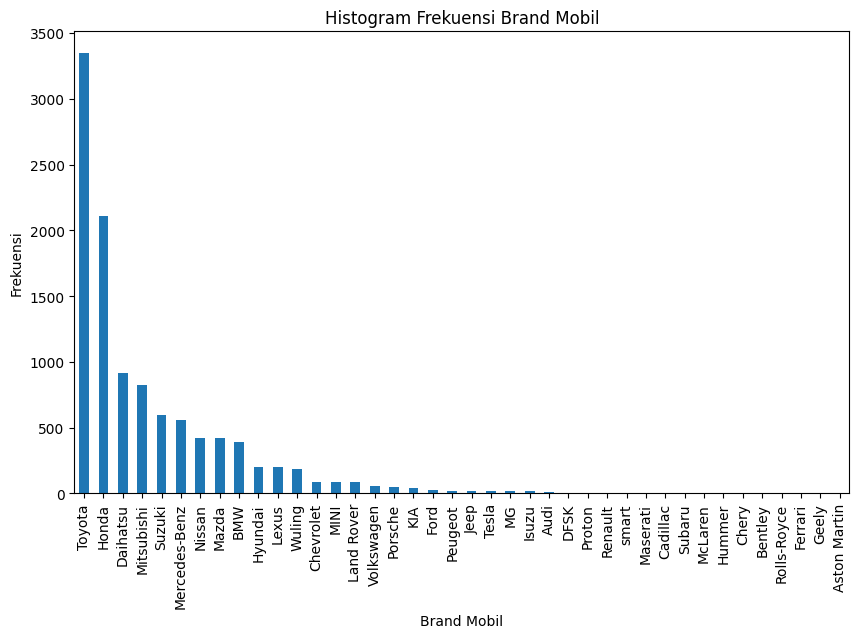

In [62]:
# Hitung frekuensi setiap kategori dalam kolom 'nama_mobil'
brand_mobil_counts = df['brand'].value_counts()

# Buat histogram dari frekuensi
plt.figure(figsize=(10, 6))
brand_mobil_counts.plot(kind='bar')
plt.xlabel('Brand Mobil')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi Brand Mobil')
plt.xticks(rotation=90)
plt.show()

In [63]:
brand_mobil_counts

brand
Toyota           3345
Honda            2112
Daihatsu          914
Mitsubishi        821
Suzuki            594
Mercedes-Benz     561
Nissan            425
Mazda             419
BMW               390
Hyundai           204
Lexus             199
Wuling            187
Chevrolet          90
MINI               86
Land Rover         84
Volkswagen         57
Porsche            49
KIA                42
Ford               27
Peugeot            22
Jeep               20
Tesla              19
MG                 15
Isuzu              15
Audi                8
DFSK                4
Proton              3
Renault             3
smart               2
Maserati            2
Cadillac            2
Subaru              1
McLaren             1
Hummer              1
Chery               1
Bentley             1
Rolls-Royce         1
Ferrari             1
Geely               1
Aston Martin        1
Name: count, dtype: int64

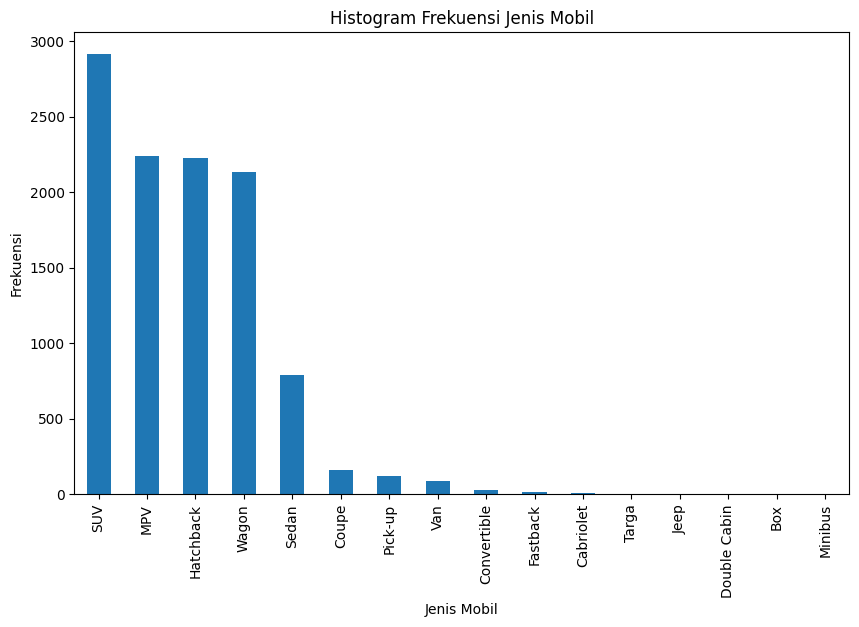

In [64]:
# Hitung frekuensi setiap kategori dalam kolom 'nama_mobil'
jenis_mobil_counts = df['jenis_mobil'].value_counts()

# Buat histogram dari frekuensi
plt.figure(figsize=(10, 6))
jenis_mobil_counts.plot(kind='bar')
plt.xlabel('Jenis Mobil')
plt.ylabel('Frekuensi')
plt.title('Histogram Frekuensi Jenis Mobil')
plt.xticks(rotation=90)
plt.show()

In [65]:
jenis_mobil_counts

jenis_mobil
SUV             2914
MPV             2241
Hatchback       2226
Wagon           2135
Sedan            787
Coupe            162
Pick-up          119
Van               85
Convertible       30
Fastback          13
Cabriolet          9
Targa              4
Jeep               2
Double Cabin       1
Box                1
Minibus            1
Name: count, dtype: int64

<Axes: ylabel='harga'>

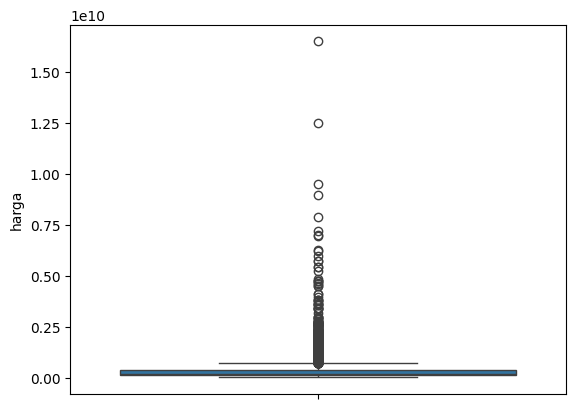

In [66]:
import seaborn as sns

sns.boxplot(df['harga'])

In [67]:
df = df[df['harga'] <= 7890000000]

In [68]:
df.reset_index(drop=True)

,nama_mobil,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,630000000,2022,12500,Lainnya,0,Electric,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,Wagon,Hyundai
1,Tesla Model Y,1390000000,2022,153,Hitam,0,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Wagon,Tesla
2,Tesla Model 3,900000000,2020,17500,Silver,0,Electric,Complete Built Up (CBU),5,4,DKI Jakarta,Automatic,Sedan,Tesla
3,Wuling EV 0.0,235000000,2022,2500,Putih,0,Electric,Complete Knock Down (CKD),4,3,DKI Jakarta,Automatic,Hatchback,Wuling
4,Hyundai IONIQ 0.0,420000000,2020,87500,Hitam,0,Electric,Complete Built Up (CBU),5,5,DKI Jakarta,Automatic,Fastback,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,BMW X1 1.5,428000000,2018,32500,Putih,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
10722,Hyundai Grand i10,115000000,2017,62000,Orange,1248,Pertamax,Complete Built Up (CBU),5,5,Banten,Automatic,Hatchback,Hyundai
10723,BMW X1 1.5,399000000,2018,17500,Hitam,1499,Pertamax,Complete Knock Down (CKD),5,5,DKI Jakarta,Automatic,SUV,BMW
10724,Hyundai Santa Fe,460000000,2021,17500,Putih,2497,Pertamax,Complete Built Up (CBU),7,5,Jawa Barat,Automatic,SUV,Hyundai


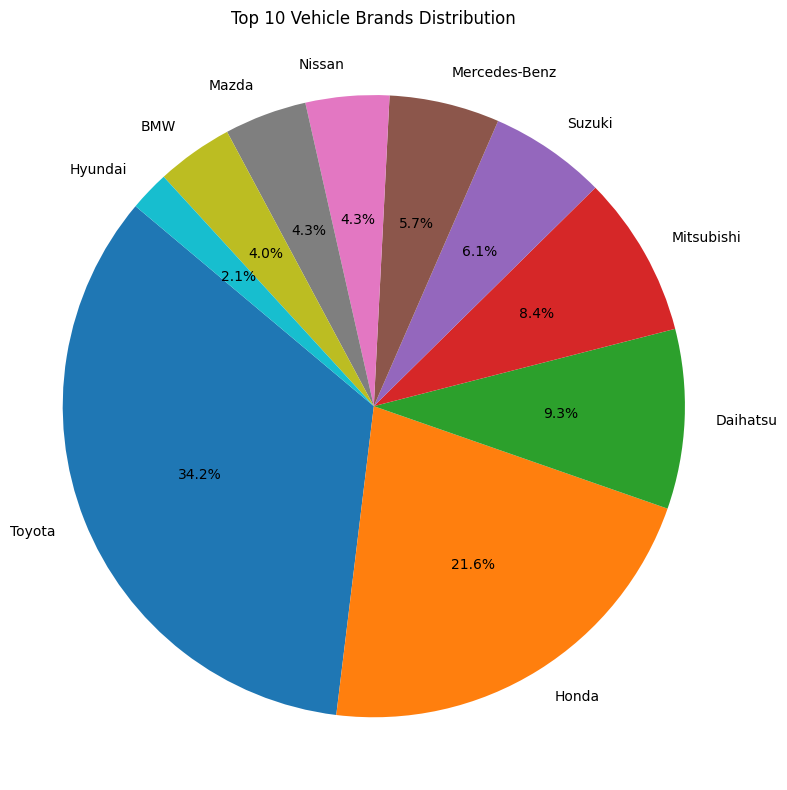

In [69]:
brand_distribution = df['brand'].value_counts()

top_10_brands = brand_distribution.head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_brands, labels=top_10_brands.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Vehicle Brands Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Transformasi Data

In [105]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan Label Encoding pada kolom-kolom kategorikal
for col in ['warna', 'bahan_bakar', 'dirakit', 'transmisi', 'jenis_mobil', 'brand']:
    df[col] = label_encoder.fit_transform(df[col])



<ipython-input-105-17549b83cef7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-105-17549b83cef7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
<ipython-input-105-17549b83cef7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [71]:
df

,nama_mobil,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,630000000,2022,12500,7,0,0,2,5,5,2,0,15,13
1,Tesla Model Y,1390000000,2022,153,5,0,0,1,5,5,2,0,15,33
2,Tesla Model 3,900000000,2020,17500,12,0,0,1,5,4,2,0,12,33
3,Wuling EV 0.0,235000000,2022,2500,11,0,0,2,4,3,2,0,6,36
4,Hyundai IONIQ 0.0,420000000,2020,87500,5,0,0,1,5,5,2,0,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,428000000,2018,32500,11,1499,1,2,5,5,2,0,11,2
12225,Hyundai Grand i10,115000000,2017,62000,10,1248,1,1,5,5,1,0,6,13
12226,BMW X1 1.5,399000000,2018,17500,5,1499,1,2,5,5,2,0,11,2
12227,Hyundai Santa Fe,460000000,2021,17500,11,2497,1,1,7,5,4,0,11,13


In [72]:
df_test = df.drop(['nama_mobil'], axis=1)
# Hitung matriks korelasi

correlation_matrix = df_test.corr()

# Ambil korelasi terhadap kolom 'harga'
harga_correlation = correlation_matrix['harga'].sort_values(ascending=False)

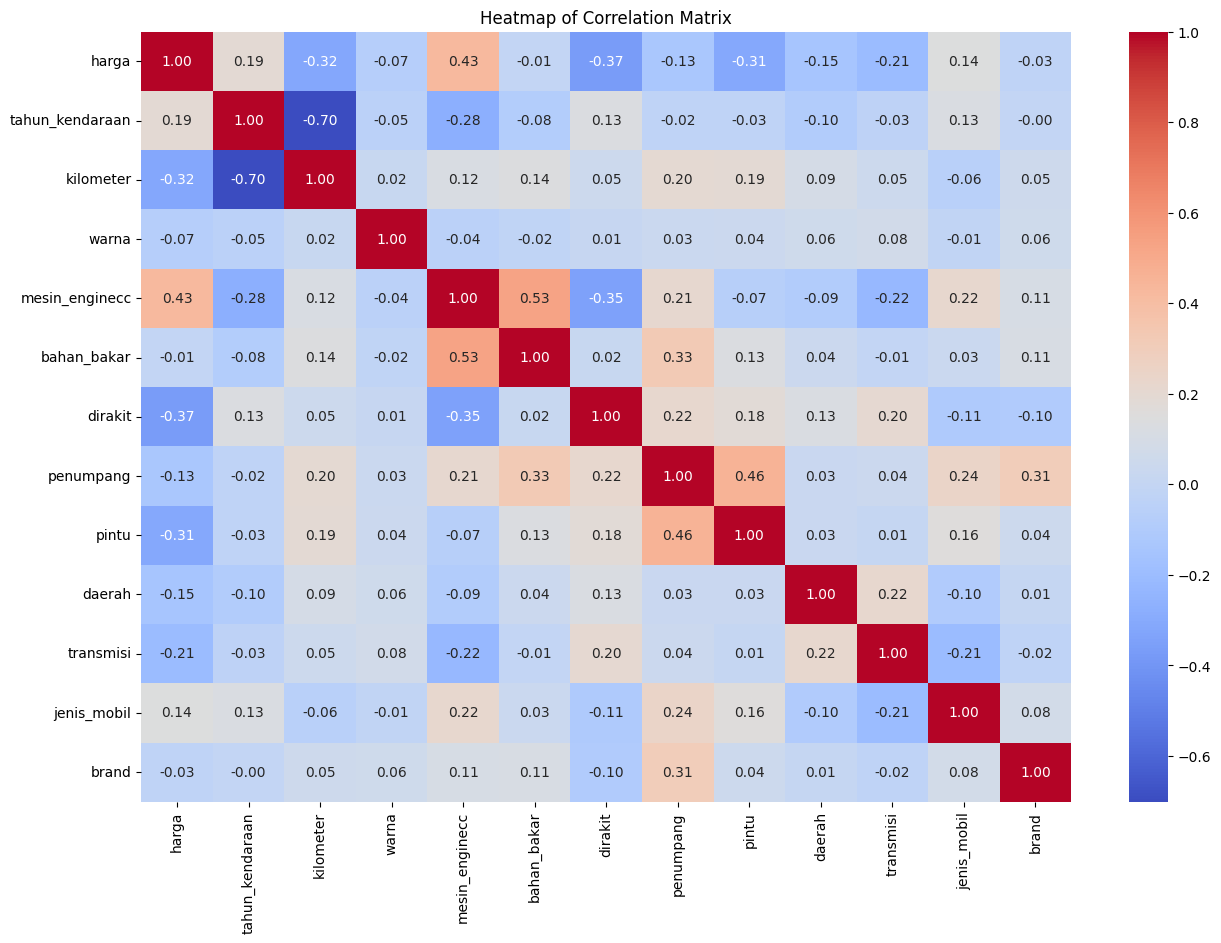

In [73]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Correlation Matrix")
plt.show()

<ipython-input-74-9f332c286168>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=harga_correlation.values, y=harga_correlation.index, palette="viridis")


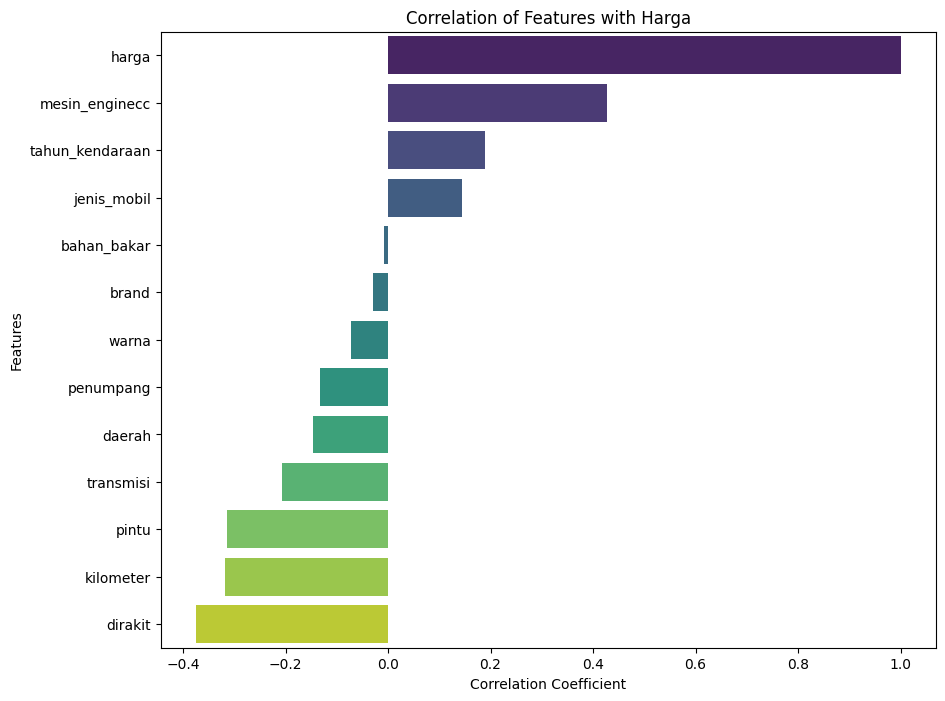

In [74]:
# Plot bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=harga_correlation.values, y=harga_correlation.index, palette="viridis")
plt.title("Correlation of Features with Harga")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 0 to 12228
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nama_mobil       10726 non-null  object
 1   harga            10726 non-null  int64 
 2   tahun_kendaraan  10726 non-null  int64 
 3   kilometer        10726 non-null  int64 
 4   warna            10726 non-null  int64 
 5   mesin_enginecc   10726 non-null  int64 
 6   bahan_bakar      10726 non-null  int64 
 7   dirakit          10726 non-null  int64 
 8   penumpang        10726 non-null  int64 
 9   pintu            10726 non-null  int64 
 10  daerah           10726 non-null  int64 
 11  transmisi        10726 non-null  int64 
 12  jenis_mobil      10726 non-null  int64 
 13  brand            10726 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.2+ MB


In [76]:
df.isnull().sum()

nama_mobil         0
harga              0
tahun_kendaraan    0
kilometer          0
warna              0
mesin_enginecc     0
bahan_bakar        0
dirakit            0
penumpang          0
pintu              0
daerah             0
transmisi          0
jenis_mobil        0
brand              0
dtype: int64

In [102]:
mesin = sorted(df['mesin_enginecc'].unique())

In [103]:
print(mesin)

[0, 658, 989, 996, 998, 999, 1197, 1198, 1199, 1229, 1248, 1298, 1329, 1332, 1339, 1364, 1368, 1372, 1373, 1390, 1395, 1398, 1399, 1451, 1462, 1468, 1485, 1490, 1491, 1493, 1495, 1496, 1497, 1498, 1499, 1500, 1584, 1595, 1597, 1598, 1618, 1668, 1699, 1781, 1796, 1798, 1799, 1984, 1986, 1987, 1988, 1991, 1995, 1996, 1997, 1998, 1999, 2143, 2151, 2171, 2198, 2199, 2260, 2261, 2354, 2356, 2359, 2360, 2362, 2387, 2393, 2442, 2446, 2455, 2477, 2487, 2488, 2493, 2494, 2496, 2497, 2498, 2499, 2597, 2693, 2694, 2706, 2720, 2754, 2755, 2776, 2799, 2894, 2925, 2967, 2979, 2981, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3283, 3445, 3456, 3471, 3498, 3564, 3604, 3605, 3653, 3726, 3745, 3778, 3800, 3956, 3982, 3995, 3996, 4164, 4196, 4197, 4395, 4461, 4511, 4608, 4663, 4664, 4691, 4806, 4999, 5038, 5439, 5461, 5663, 5998, 6162, 6749]


In [77]:
df

,nama_mobil,harga,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,daerah,transmisi,jenis_mobil,brand
0,Hyundai IONIQ 5,630000000,2022,12500,7,0,0,2,5,5,2,0,15,13
1,Tesla Model Y,1390000000,2022,153,5,0,0,1,5,5,2,0,15,33
2,Tesla Model 3,900000000,2020,17500,12,0,0,1,5,4,2,0,12,33
3,Wuling EV 0.0,235000000,2022,2500,11,0,0,2,4,3,2,0,6,36
4,Hyundai IONIQ 0.0,420000000,2020,87500,5,0,0,1,5,5,2,0,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12224,BMW X1 1.5,428000000,2018,32500,11,1499,1,2,5,5,2,0,11,2
12225,Hyundai Grand i10,115000000,2017,62000,10,1248,1,1,5,5,1,0,6,13
12226,BMW X1 1.5,399000000,2018,17500,5,1499,1,2,5,5,2,0,11,2
12227,Hyundai Santa Fe,460000000,2021,17500,11,2497,1,1,7,5,4,0,11,13


# Train Test Split

In [78]:
X = df.drop(['nama_mobil', 'harga', 'daerah'], axis=1)
y = df['harga']

In [79]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X  = pd.DataFrame(ss.fit_transform(X),columns = X.columns)

In [80]:
# Split data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran dari masing-masing data setelah splitting
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (8580, 11) (8580,)
Testing set shape: (2146, 11) (2146,)


In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Linear Regression

In [82]:
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
train_rmse_lr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_lr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_lr}")
print(f"Test RMSE: {test_rmse_lr}\n")
print("R squared for train is :",lr.score(X_train,y_train)*100)
print("R squared for test is :", lr.score(X_test,y_test)*100)

Train RMSE: 325502538.7593041
Test RMSE: 327384146.2471593

R squared for train is : 46.467798280105434
R squared for test is : 44.85793314667343


# Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
train_rmse_rf = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_rf}")
print(f"Test RMSE: {test_rmse_rf}\n")
print("R squared for train is :",rf.score(X_train,y_train)*100)
print("R squared for test is :", rf.score(X_test,y_test)*100)

Train RMSE: 56720379.024362125
Test RMSE: 119380810.48067564

R squared for train is : 98.37450890745609
R squared for test is : 92.66775788524288


# Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
train_rmse_dt = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_dt = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_dt}")
print(f"Test RMSE: {test_rmse_dt}\n")
print("R squared for train is :",dt.score(X_train,y_train)*100)
print("R squared for test is :", dt.score(X_test,y_test)*100)

Train RMSE: 13872724.668319901
Test RMSE: 173410567.75686684

R squared for train is : 99.90276337437042
R squared for test is : 84.52898271110757


# XGBoost

In [85]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
train_rmse_xgb = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_xgb = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_xgb}")
print(f"Test RMSE: {test_rmse_xgb}\n")
print("R squared for train is :", xgb.score(X_train,y_train)*100)
print("R squared for test is :", xgb.score(X_test,y_test)*100)

Train RMSE: 139191347.1701075
Test RMSE: 158228069.9829543

R squared for train is : 90.21116919988395
R squared for test is : 87.11943799421002


# Extra Tree Regressor

In [86]:
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_train_pred = etr.predict(X_train)
y_test_pred = etr.predict(X_test)
train_rmse_etr = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_etr = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_etr}")
print(f"Test RMSE: {test_rmse_etr}\n")
print("R squared for train is :", etr.score(X_train,y_train)*100)
print("R squared for test is :", etr.score(X_test,y_test)*100)

Train RMSE: 13953953.396783974
Test RMSE: 97754752.13479656

R squared for train is : 99.9016213447613
R squared for test is : 95.08364189800551


# XGB

In [87]:
xg = XGBRegressor()
xg.fit(X_train,y_train)
y_train_pred = xg.predict(X_train)
y_test_pred = xg.predict(X_test)
train_rmse_xg = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse_xg = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Train RMSE: {train_rmse_xg}")
print(f"Test RMSE: {test_rmse_xg}\n")
print("R squared for train is :", xg.score(X_train,y_train)*100)
print("R squared for test is :", xg.score(X_test,y_test)*100)

Train RMSE: 34165580.10872898
Test RMSE: 102537378.07777359

R squared for train is : 99.41022828035855
R squared for test is : 94.59081085936984


In [88]:
models_performance = {
    "Decision Tree": (test_rmse_dt, dt.score(X_test,y_test)*100),
    "Random Forest": (test_rmse_rf, rf.score(X_test,y_test)*100),
    "Linear Regression": (test_rmse_lr, lr.score(X_test,y_test)*100),
    "Gradient Boosting": (test_rmse_xgb, xgb.score(X_test,y_test)*100),
    "Extra Tree Regression": (test_rmse_etr, etr.score(X_test,y_test)*100),
    "XGB Regression": (test_rmse_xg, xg.score(X_test,y_test)*100)


}

sorted_models = sorted(models_performance.items(), key=lambda x: (x[1][0], x[1][1]), reverse=False)

print("Models sorted by RMSE and R squared (Test Set):")
for model, (rmse, r2) in sorted_models:
    print(f"{model}: RMSE = {rmse}, R squared = {r2}")

best_model_name, (best_rmse, best_r2) = sorted_models[0]
print(f"\nBest Model: {best_model_name}")
print(f"RMSE: {best_rmse}")
print(f"R squared: {best_r2}")

Models sorted by RMSE and R squared (Test Set):
Extra Tree Regression: RMSE = 97754752.13479656, R squared = 95.08364189800551
XGB Regression: RMSE = 102537378.07777359, R squared = 94.59081085936984
Random Forest: RMSE = 119380810.48067564, R squared = 92.66775788524288
Gradient Boosting: RMSE = 158228069.9829543, R squared = 87.11943799421002
Decision Tree: RMSE = 173410567.75686684, R squared = 84.52898271110757
Linear Regression: RMSE = 327384146.2471593, R squared = 44.85793314667343

Best Model: Extra Tree Regression
RMSE: 97754752.13479656
R squared: 95.08364189800551


# Hyperparameter optimization using RandomizedSearchCV


In [89]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [90]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations
etr_random = RandomizedSearchCV(estimator = etr, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [91]:
etr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   3.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   5.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   7.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  15.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   6.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s
[CV] END max_depth=5, max_feat

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   5.9s


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [92]:
etr_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [93]:
predictions=etr_random.predict(X_test)

In [100]:
X_test.head()

,tahun_kendaraan,kilometer,warna,mesin_enginecc,bahan_bakar,dirakit,penumpang,pintu,transmisi,jenis_mobil,brand
958,-1.490379,1.741000,-0.477409,-0.327049,-0.174396,0.646782,-0.808729,-1.451220,-0.431710,0.590123,1.079358
107,1.373024,-1.301746,0.967956,-2.652531,-3.312941,0.646782,-1.627071,-3.224896,-0.431710,-1.232411,1.264707
2009,0.800343,-0.446285,-1.681880,-1.105317,-0.174396,0.646782,-0.808729,0.322457,-0.431710,1.501391,1.079358
2955,-0.058678,0.285774,0.486168,-0.789971,-0.174396,0.646782,-0.808729,0.322457,2.316372,-1.232411,-1.052159
1355,0.227663,-0.375693,-1.681880,-0.323943,-0.174396,0.646782,-0.808729,0.322457,-0.431710,0.286368,-1.886230


In [94]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.957936999833383


In [95]:
import joblib

# Save model
joblib.dump(etr_random, 'extra_tree_model_mobil123.pkl')

['extra_tree_model_mobil123.pkl']